In [33]:
import matplotlib.pyplot as plt
import astropy.units as u
import numpy as np
import pandas as pd
import os
from astLib import astSED
import astropy.io.fits as fits
from carf import * # custom module for functions relating to the project
import matplotlib.path as mpath
import seaborn as sns
from scipy.stats import gaussian_kde
import scipy as sp

# So that we can change the helper functions without reloading the kernel
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [34]:
# We need to ensure we are reading in our final dataframe we will be doing our analysis on. This dataframe should contain
zfourge_full = pd.read_csv('datasets/full_zfourge_decomposed/zfourge_full.csv')

c:\Users\Mitchell\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (156) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


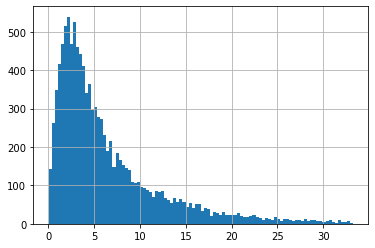

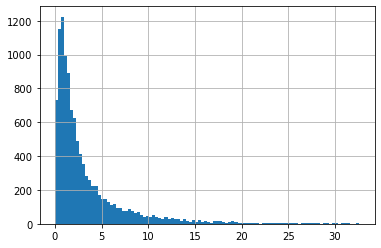

<AxesSubplot:>

In [35]:
# Loook for the uvj errors
# zfourge_full['eU']
# zfourge_full['eV']
# zfourge_full['eJ']
# This is good cause it's not yet in magnitude, it's a flux value
((zfourge_full['eU']/zfourge_full['U'])*100).hist(bins=100)
plt.show()

((zfourge_full['eV']/zfourge_full['V'])*100).hist(bins=100)
plt.show()

((zfourge_full['eJ']/zfourge_full['J'])*100).hist(bins=100)


In [36]:
# create a flux to mag function
def flux_to_mag(flux):
    return -2.5*np.log10(flux) + 25

# create a flux to mag error function
def flux_to_mag_error(flux, error):
    return np.abs(-2.5*(error/flux)/np.log(10))

In [37]:
# flux to magnitude
# Calculate the magnitude
zfourge_full['Umag'] = flux_to_mag(zfourge_full['U'])
zfourge_full['Vmag'] = flux_to_mag(zfourge_full['V'])
zfourge_full['Jmag'] = flux_to_mag(zfourge_full['J'])

# Calculate the error in the magnitude
zfourge_full['eUmag'] = flux_to_mag_error(zfourge_full['U'], zfourge_full['eU'])
zfourge_full['eVmag'] = flux_to_mag_error(zfourge_full['V'],zfourge_full['eV'])
zfourge_full['eJmag'] = flux_to_mag_error(zfourge_full['J'], zfourge_full['eJ'])


# Print the magnitudes and the errors with a sentence
# calculated
# Show the errors
(zfourge_full['eUmag']/zfourge_full['Umag']).hist(bins=100)



<AxesSubplot:>

In [38]:
# Test galaxy
zfourge_full.iloc[0]
zfourge_full.iloc[4]['eUmag']
# /zfourge_full.iloc[0]['Umag']

# vs
#zfourge_full.iloc[0]['eU']/zfourge_full.iloc[0]['U']


0.0008140420747957814

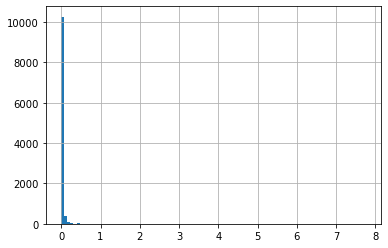

In [40]:


plt.show()
